## 0. 필요 패키지 설치

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A. 데이터 전처리 - 데이터 읽어오기

In [31]:
# CSV 파일 경로
csv_path = 'NFLX.csv'

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols = range(0, 5))

# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


### 데이터 설명
  - `Date`: 주식 가격 데이터가 기록된 특정 날짜
  - `Price`: 해당 날짜 주식 가격의 개장 후 첫 거래 가격.
  - `High`: 해당 거래일에 주식의 최고 가격
  - `Low`: 해당 거래일에 주식의 최저 가격
  - `Close`: 해당 거래일의 종가(마지막 거래 가격)입니다.

## B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

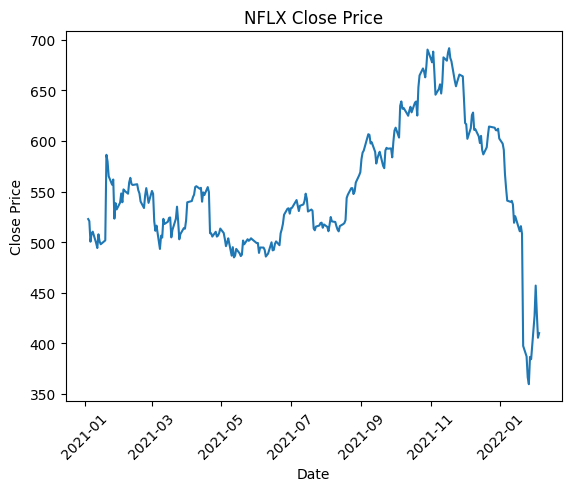

In [14]:
# CSV 파일 경로
csv_path = 'NFLX.csv'

# CSV 파일 읽어오기
df = pd.read_csv(csv_path)

# 'Date' 열의 데이터를 datetime 타입으로 변환
df['Date'] = pd.to_datetime(df['Date'])

#2021년 이후의 데이터만 필터링
df_2021 = df[df['Date'] >= '2021-01-01']

# DataFrame 출력
# df_2021

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_2021['Date'], df_2021['Close'])


# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

## C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [33]:
# CSV 파일 경로
csv_path = 'NFLX.csv'

# CSV 파일 읽어오기
df = pd.read_csv(csv_path)

# 'Date' 열의 데이터를 datetime 타입으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2021년 이후의 데이터만 필터링
df_2021 = df[df['Date'] >= '2021-01-01']

# 가장 높은 종가 찾기
max_price = df_2021['Close'].max()

# 가장 낮은 종가 찾기
min_price = df_2021['Close'].min()

# 최고 종가, 최저 종가 출력
print('최고 종가:', max_price)
print('죄저 종가:', min_price)

최고 종가: 691.690002
죄저 종가: 359.700012


## D. 데이터 분석 - 2021년 이후 월 별 평군 종가 출력하기

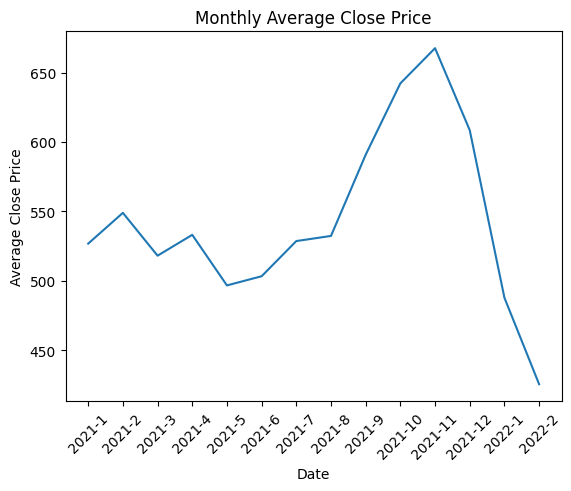

In [29]:
# CSV 파일 경로
csv_path = 'NFLX.csv'

# CSV 파일 읽어오기
df = pd.read_csv(csv_path)

# 'Date' 열의 데이터를 datetime 타입으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2021년 이후의 데이터만 필터링
df_2021 = df[df['Date'] >= '2021-01-01'].copy()  #.copy()를 안 쓸 경우 A value is trying to be set on a copy of a slice from a DataFrame.

# # DataFrame 출력
# df_2021

# 연도와 월을 추출
df_2021['Year'] = df_2021['Date'].dt.year
df_2021['Month'] = df_2021['Date'].dt.month

# # 월 별로 그룹화 
# monthly_grouped = df_2021.groupby([df_2021['Date'].dt.month])
# # **지금 2021년 2022년이 두개가 있으므로 이렇게 그룹화하면 2021년 1월과 2022년 1월이 합쳐진다.

# 월 별로 그룹화
monthly_grouped = df_2021.groupby(['Year', 'Month'])
# https://www.askpython.com/python-modules/pandas/groupby-to-group-dataframe-by-month

# 월 별로 평균 종가를 계산
avg_close_monthly = monthly_grouped['Close'].mean().reset_index()
# 모든 월에 2021붙이기: https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/

# print(avg_close_monthly)

# # 년도, 월 붙이기
# avg_close_monthly['Date'] = pd.to_datetime(avg_close_monthly['Year'].astype('str') + "-" + avg_close_monthly['Month'].astype('str'))
# #년 월 붙이는 방법: https://www.skytowner.com/explore/combining_columns_of_years_months_and_days_in_pandas

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(avg_close_monthly['Year'].astype('str') + "-" + avg_close_monthly['Month'].astype('str'), avg_close_monthly['Close'])

# 그래프 제목 설정
plt.title('Monthly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Average Close Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

## E. 데이터 분석 - 2022년 이후 최고, 최저, 종가 시각화하기

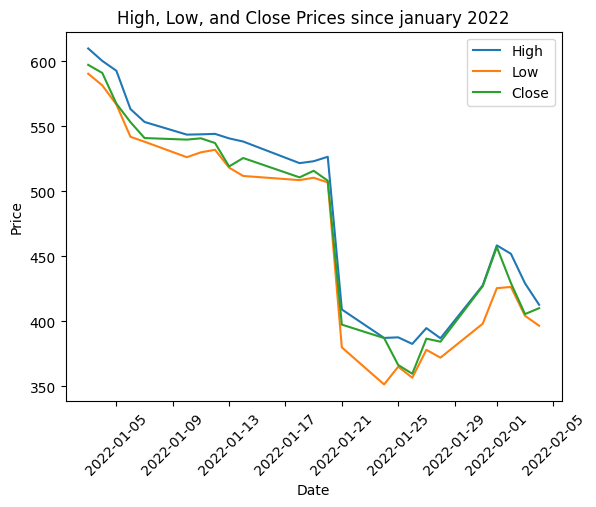

In [39]:
# CSV 파일 경로
csv_path = 'NFLX.csv'

# CSV 파일 읽어오기
df = pd.read_csv(csv_path)

# 'Date' 열의 데이터를 datetime 타입으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2022년 이후의 데이터만 필터링
df_2022 = df[df['Date'] >= '2022-01-01']

# # DataFrame 출력
# df_2022

# 그래프 그리기
plt.plot(df_2022['Date'], df_2022['High'], label = 'High')
plt.plot(df_2022['Date'], df_2022['Low'], label = 'Low')
plt.plot(df_2022['Date'], df_2022['Close'], label = 'Close')

#그래프 제목 설정
plt.title('High, Low, and Close Prices since january 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# 범례 표시
plt.legend()

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()